# LP2- Vodafone Churn Analysis Project

## Business Understanding

This project aims to analyze and predict customer churn in Vodafone, a telecom organization. The primary goal is to develop a robust churn prediction model to identify customers likely to leave and understand the reasons behind churn. The dataset is divided into three parts: train dataset, evaluation dataset, and test dataset.

## Table of Contents

- [Understanding The Problem](#Understanding-The-Problem)
- [Data Structure](#Data-Structure)
- [Data Cleaning](#Data-Cleaning)
- [Project Hypothesis](#Hypothesis)
- [Analytical Questions](#Analytical-Questions)
- [Evaluation](#evaluation)
- [Dependencies](#dependencies)
- [Contributing](#contributing)
- [License](#license)

## Understanding The Problem

Customer attrition, or churn, is a significant concern for organizations. It represents the percentage of customers who stop using a company's product or service within a specified timeframe. This project aims to assess the likelihood of customer churn, identify key indicators, and propose retention strategies. The objective is to empower the organization to proactively address customer attrition.

### Importance of this project to every Organization

Addressing customer attrition is crucial for the following reasons:

1. **Revenue Protection:** Retaining existing customers is cost-effective, safeguarding established revenue streams.
2. **Customer Lifetime Value (CLV):** Addressing attrition maximizes the long-term value of customers.
3. **Brand Reputation and Loyalty:** Effective attrition management enhances brand reputation and fosters loyalty.

## Data Structure

### I. Data Collection and Analysis

Three datasets are used for this analysis, located in different places:

A. **First Dataset - Customer Churn Data:**
   - Comprises the first 3000 records of customer churn data.
   - Stored in a remote SQL server, accessed using ODBC or SQLAlchemy.
   - Retrieved and converted to a .csv file.

B. **Second Dataset - CSV File with 2000 Records:**
   - A CSV file containing 2000 records.
   - No additional connection is required.

C. **Third Dataset - Test Dataset:**
   - Integral to project evaluation and in CSV format.

The project encompasses a holistic approach, from understanding the business problem to comprehensive data analysis, aiming to provide actionable insights for effective churn management.

| Column           | Description                                           |
|------------------|-------------------------------------------------------|
| Gender           | Whether the customer is a male or a female            |
| SeniorCitizen    | Whether a customer is a senior citizen or not          |
| Partner          | Whether the customer has a partner or not (Yes, No)   |
| Dependents       | Whether the customer has dependents or not (Yes, No)  |
| Tenure           | Number of months the customer has stayed with the company |
| Phone Service    | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines    | Whether the customer has multiple lines or not        |
| InternetService  | Customer's internet service provider (DSL, Fiber Optic, No) |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No Internet) |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No Internet) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet) |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No Internet service) |
| Contract         | The contract term of the customer (Month-to-Month, One year, Two years) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| Payment Method   | The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly            |
| TotalCharges     | The total amount charged to the customer              |
| Churn            | Whether the customer churned or not (Yes or No)       |












## Data Cleaning
Importing the neccessary Libraries

Reading the .csv files 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_context('poster')
import sklearn
import scipy.stats as stats
import random
import pickle

In [60]:
data_1 = pd.read_csv('C:\\Users\\Brian Bassey\\.vscode\Project_Portfolio\\Telco_churn\\Telco-churn-first-3000.csv')
data_2 = pd.read_csv('C:\\Users\\Brian Bassey\\.vscode\Project_Portfolio\Telco_churn\\Telco-churn-second-2000.csv')
data_3 = pd.read_csv('C:\\Users\\Brian Bassey\\.vscode\Project_Portfolio\\Telco_churn\\LP2_Telco-churn-last-2000.csv')

In [61]:
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [62]:
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [63]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


Combining train data set

In [64]:
data_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
data_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [66]:
data_3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [67]:
train_data = pd.concat([data_1, data_3], axis=0)
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [68]:
test_data= data_2
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [69]:
train_data.to_csv('C:\\Users\\Brian Bassey\\.vscode\Project_Portfolio\\Telco_churn\\train_data.csv', index=False)

In [70]:
train_data.shape

(5043, 21)

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [72]:
train_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [73]:
train_data.duplicated().sum()

0

In [74]:
train_data.columns
for col in train_data.columns:
    print('column: {} - unique value: {}'.format(col, train_data[col].unique()))

column: customerID - unique value: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column: gender - unique value: ['Female' 'Male']
column: SeniorCitizen - unique value: [0 1]
column: Partner - unique value: [True False 'No' 'Yes']
column: Dependents - unique value: [False True 'No' 'Yes']
column: tenure - unique value: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column: PhoneService - unique value: [False True 'Yes' 'No']
column: MultipleLines - unique value: [nan False True 'No' 'No phone service' 'Yes']
column: InternetService - unique value: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity - unique value: [False True nan 'No' 'Yes' 'No internet service']
column: OnlineBackup - unique value: [True False nan 'No' 'Yes' 'No internet service']
column: DeviceProtection - u

Harmonizing the values of each columns

In [75]:
train_data = train_data.replace({
    True: 'Yes',
    False: 'No',
    'No internet service': 'No',
    'No phone service': 'No'
}, inplace = False)

train_data.columns
for col in train_data.columns:
    print('column: {} - unique value: {}'.format(col, train_data[col].unique()))

column: customerID - unique value: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column: gender - unique value: ['Female' 'Male']
column: SeniorCitizen - unique value: [0 1]
column: Partner - unique value: ['Yes' 'No']
column: Dependents - unique value: ['No' 'Yes']
column: tenure - unique value: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column: PhoneService - unique value: ['No' 'Yes']
column: MultipleLines - unique value: [nan 'No' 'Yes']
column: InternetService - unique value: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity - unique value: ['No' 'Yes' nan]
column: OnlineBackup - unique value: ['Yes' 'No' nan]
column: DeviceProtection - unique value: ['No' 'Yes' nan]
column: TechSupport - unique value: ['No' 'Yes' nan]
column: StreamingTV - unique value: ['No' 'Yes

In [76]:
def replace_none_with_mode(train_data):
   categorical_cols = train_data.select_dtypes(include='object').columns

   for col in categorical_cols:
       mode_val = train_data[col].mode()[0] 
       train_data[col] = train_data[col].replace({None: mode_val})  

   return train_data
train_data = replace_none_with_mode(train_data)
train_data.columns
for col in train_data.columns:
    print('column: {} - unique value: {}'.format(col, train_data[col].unique()))

column: customerID - unique value: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column: gender - unique value: ['Female' 'Male']
column: SeniorCitizen - unique value: [0 1]
column: Partner - unique value: ['Yes' 'No']
column: Dependents - unique value: ['No' 'Yes']
column: tenure - unique value: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column: PhoneService - unique value: ['No' 'Yes']
column: MultipleLines - unique value: ['No' 'Yes']
column: InternetService - unique value: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity - unique value: ['No' 'Yes']
column: OnlineBackup - unique value: ['Yes' 'No']
column: DeviceProtection - unique value: ['No' 'Yes']
column: TechSupport - unique value: ['No' 'Yes']
column: StreamingTV - unique value: ['No' 'Yes']
column: Streaming

In [77]:
test_data.columns
for column in test_data.columns:
    print('column: {} - unique value: {}'.format(column, test_data[column].unique()))

column: customerID - unique value: ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
column: gender - unique value: ['Male' 'Female']
column: SeniorCitizen - unique value: [0 1]
column: Partner - unique value: ['No' 'Yes']
column: Dependents - unique value: ['No' 'Yes']
column: tenure - unique value: [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
column: PhoneService - unique value: ['Yes' 'No']
column: MultipleLines - unique value: ['Yes' 'No' 'No phone service']
column: InternetService - unique value: ['Fiber optic' 'No' 'DSL']
column: OnlineSecurity - unique value: ['No' 'No internet service' 'Yes']
column: OnlineBackup - unique value: ['No' 'No internet service' 'Yes']
column: DeviceProtection - unique value: ['No' 'No internet service' 'Yes']
column: TechSupport - unique v

In [78]:
test_data = test_data.replace({
    True: 'Yes',
    False: 'No',
    'No internet service': 'No',
    'No phone service': 'No'
}, inplace = False)

test_data.columns
for column in test_data.columns:
    print('column: {} - unique value: {}'.format(column, test_data[column].unique()))

column: customerID - unique value: ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
column: gender - unique value: ['Male' 'Female']
column: SeniorCitizen - unique value: [0 1]
column: Partner - unique value: ['No' 'Yes']
column: Dependents - unique value: ['No' 'Yes']
column: tenure - unique value: [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
column: PhoneService - unique value: ['Yes' 'No']
column: MultipleLines - unique value: ['Yes' 'No']
column: InternetService - unique value: ['Fiber optic' 'No' 'DSL']
column: OnlineSecurity - unique value: ['No' 'Yes']
column: OnlineBackup - unique value: ['No' 'Yes']
column: DeviceProtection - unique value: ['No' 'Yes']
column: TechSupport - unique value: ['No' 'Yes']
column: StreamingTV - unique value: ['Yes' 'No']
column: Streaming

In [79]:
train_data.drop(columns='customerID', inplace=True)

In [80]:
test_data.drop(columns='customerID', inplace=True)

In [81]:
train_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [82]:
test_data.columns
for column in test_data.columns:
    print('column: {} - unique value: {}'.format(column, test_data[column].unique()))

column: gender - unique value: ['Male' 'Female']
column: SeniorCitizen - unique value: [0 1]
column: Partner - unique value: ['No' 'Yes']
column: Dependents - unique value: ['No' 'Yes']
column: tenure - unique value: [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
column: PhoneService - unique value: ['Yes' 'No']
column: MultipleLines - unique value: ['Yes' 'No']
column: InternetService - unique value: ['Fiber optic' 'No' 'DSL']
column: OnlineSecurity - unique value: ['No' 'Yes']
column: OnlineBackup - unique value: ['No' 'Yes']
column: DeviceProtection - unique value: ['No' 'Yes']
column: TechSupport - unique value: ['No' 'Yes']
column: StreamingTV - unique value: ['Yes' 'No']
column: StreamingMovies - unique value: ['No' 'Yes']
column: Contract - unique value: ['Month-to-month' 'One year' 'Two year']
column: Pa

In [83]:
test_data ['SeniorCitizen'] = test_data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
test_data ['SeniorCitizen'].unique()


array(['No', 'Yes'], dtype=object)

In [84]:
train_data['SeniorCitizen'] = train_data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})  
train_data['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 
 17  

In [86]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   object 
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


In [87]:
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 
 17  

In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   object 
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


In [90]:
train_data['TotalCharges'].fillna(train_data['TotalCharges'].mean(), inplace=True)
test_data['TotalCharges'].fillna(test_data['TotalCharges'].mean(), inplace=True)

In [91]:
train_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [92]:
test_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [93]:
train_cat = train_data.select_dtypes(include='object').columns
train_num = train_data.select_dtypes(exclude='object').columns

In [94]:
test_data_cat = test_data.select_dtypes(include='object').columns
test_data_num = test_data.select_dtypes(exclude='object').columns

In [95]:
train_data_cat = train_data[train_cat]
train_data_num = train_data[train_num]

In [96]:
train_data_cat.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043
unique,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,2559,4224,2585,3482,4554,2913,2248,3587,3311,3299,3552,3098,3061,2744,2996,1700,3707


In [97]:
train_data_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000
mean,32.576641,65.090214,2299.799108
std,24.529807,30.068133,2268.819487
min,0.000000,18.400000,18.799999
25%,9.000000,35.775000,416.650000
50%,29.000000,70.550003,1400.849976
75%,56.000000,90.050003,3857.575073
max,72.000000,118.650002,8670.100000


In [98]:
test_data_cat = test_data[test_data_cat]
test_data_num = test_data[test_data_num]

In [99]:
test_data_cat.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1004,1677,1056,1451,1807,1159,848,1437,1303,1322,1447,1238,1250,1131,1175,665


In [100]:
test_data_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,2000.000000,2000.000000,2000.000000
mean,31.853000,63.933325,2235.995093
std,24.632677,30.136858,2258.097978
min,0.000000,18.250000,18.900000
25%,8.000000,34.250000,354.812500
50%,27.000000,69.800000,1389.475000
75%,55.000000,89.275000,3626.262500
max,72.000000,118.750000,8684.800000


Exploratory Data Analysis (EDA)
- Analyze and visualize the data to gain insights into the patterns and relationships.
- Identify potential features that might be strong indicators of churn.

In [101]:
train_data_num = train_data[train_num]
correlation_matrix = train_data_num.corr()
print(correlation_matrix)


                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.240645      0.826017
MonthlyCharges  0.240645        1.000000      0.646841
TotalCharges    0.826017        0.646841      1.000000


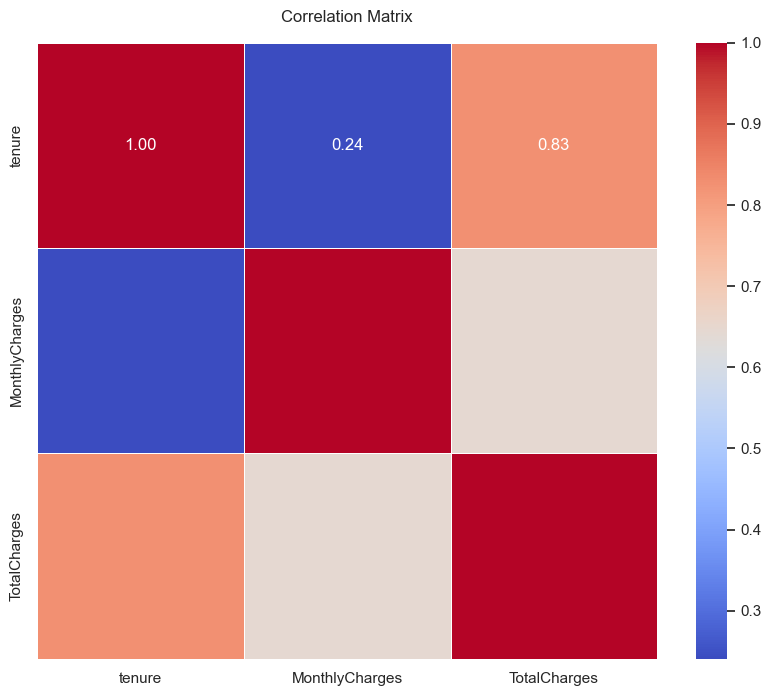

In [102]:
sns.set(style="white")  
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
heatmap.set_title("Correlation Matrix", pad=15)
plt.savefig("correlation_heatmap.png") 
plt.show()

In this analysis there will be no calculation to be done on the churn column so the column will be converted to int

In [103]:
train_data['Churn'] = train_data['Churn'].replace({'Yes': 1, 'No': 0})
train_data['Churn'].unique()

array([0, 1], dtype=int64)

## Hypothesis Testing

Hypothesis 1: Total Charges Impact Churn

- Null Hypothesis (H0): There is no relationship between the Total charges and the likelihood of customer churn.
- Alternative Hypothesis (H1): There is a relationship between the monthly charges and the likelihood of customer churn.
- Rationale: This hypothesis assumes that the amount customers are charged on a monthly basis may influence their decision to churn. For example, higher monthly charges might contribute to dissatisfaction and increase the probability of churn.

In [104]:
null_hypoth = 'There is no relationship between Churn and TotalCharges'
alt_hypoth = 'There is a relationship between Churn and TotalCharges'
obeserved_value = pd.crosstab(train_data['Churn'], train_data['TotalCharges'])
chi2, p_value, dof, expected_value = stats.chi2_contingency(obeserved_value)
print('chi2:', chi2)
print('p_value:', p_value)
print('dof:', dof)
print('expected_value:', expected_value)
alpha = 0.05
if p_value <= alpha:
    print('The null hypothesis is rejected')
    print(alt_hypoth)
else:
    print('The null hypothesis is accepted')
    print(null_hypoth)

chi2: 4865.839055400125
p_value: 0.48582388056510856
dof: 4863
expected_value: [[0.73507833 0.73507833 0.73507833 ... 0.73507833 0.73507833 0.73507833]
 [0.26492167 0.26492167 0.26492167 ... 0.26492167 0.26492167 0.26492167]]
The null hypothesis is accepted
There is no relationship between Churn and TotalCharges


## Analytical Questions
1. **What is the overall churn rate of the telecommunication company?**
   - This question provides a fundamental understanding of the scale of customer churn in the organization.

2. **What is the average monthly charge for churned customers compared to non-churned customers?**
   - This question explores the relationship between monthly charges and customer churn, investigating whether there's a notable difference between the two groups.

3. **What percentage of the top 100 most charged customers churned?**
   - Focusing on high-spending customers, this question examines whether there's a correlation between higher spending and an increased likelihood of churn.

4. **What is the churn rate among male customers with partners, dependents, and high monthly charges?**
   - This question delves into the intersection of demographic factors (gender, partnership status) and financial factors (monthly charges) to identify potential patterns in churn behavior.

5. **How does the absence of online security, online backup, device protection, and tech support contribute to customer churn?**
   - By analyzing the impact of lacking specific services on customer churn, this question provides insights into the importance of these additional offerings in retaining customers.

In [105]:
total_customer = len(train_data)
churn_customer = len(train_data[train_data['Churn'] == 1])
non_churn_customer = len(train_data[train_data['Churn'] == 0])
churn_rate = churn_customer / total_customer * 100

print('Total number of customers:', total_customer)
print('Number of churn customers:', churn_customer)
print('Number of non-churn customers:', non_churn_customer)
print(f'Churn rate: {churn_rate:.2f}%')

Total number of customers: 5043
Number of churn customers: 1336
Number of non-churn customers: 3707
Churn rate: 26.49%


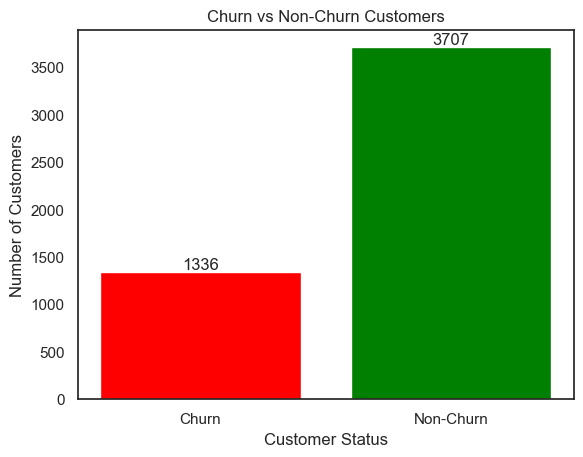

In [106]:
labels = ['Churn', 'Non-Churn']
counts = [churn_customer, non_churn_customer]
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Churn vs Non-Churn Customers')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')
folder_path = 'C:\\Users\\Brian Bassey\\.vscode\\Project_Portfolio\\Telco_churn\\telcom_images'
os.makedirs(folder_path, exist_ok=True)
plt.savefig(os.path.join(folder_path, 'churn_vs_non_churn.png'))
plt.show()

## Question 2

Percentage of churned customers among the top 100 most charged customers: 7.00%


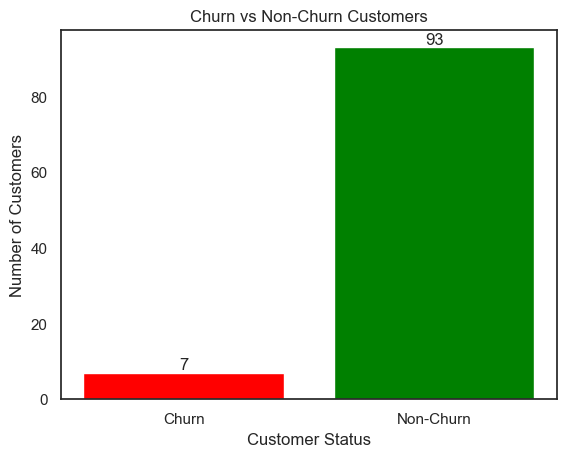

In [107]:
sorted_customers = train_data.sort_values(by='TotalCharges', ascending=False)
top_100_customers = sorted_customers.head(100)

churned_top_100 = top_100_customers[top_100_customers['Churn'] == 1]
non_churned_top_100 = top_100_customers[top_100_customers['Churn'] == 0]
percentage_churned_top_100 = len(churned_top_100) / len(top_100_customers) * 100
print(f'Percentage of churned customers among the top 100 most charged customers: {percentage_churned_top_100:.2f}%')

labels = ['Churn', 'Non-Churn'] 
counts = [len(churned_top_100), len(non_churned_top_100)]
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Churn vs Non-Churn Customers')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')
plt.savefig(os.path.join(folder_path, 'churn_vs_non_churn_top_100.png'))
plt.show()


## Question 3

Percentage of churned customers among the top 100 most charged customers: 7.00%


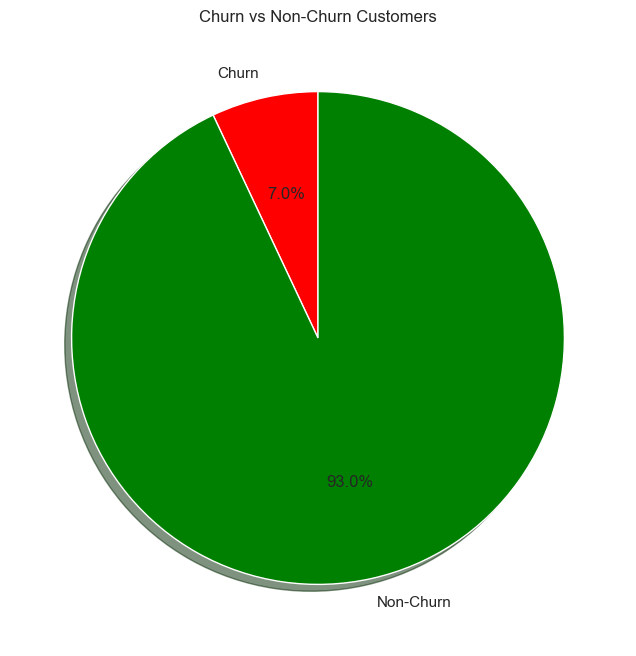

In [108]:
sorted_customers = train_data.sort_values(by='TotalCharges', ascending=False)
top_100_customers = sorted_customers.head(100)
churned_top_100 = top_100_customers[top_100_customers['Churn'] == 1]
non_churned_top_100 = top_100_customers[top_100_customers['Churn'] == 0]
percentage_churned_top_100 = len(churned_top_100) / len(top_100_customers) * 100
print(f'Percentage of churned customers among the top 100 most charged customers: {percentage_churned_top_100:.2f}%')

labels = ['Churn', 'Non-Churn']
counts = [len(churned_top_100), len(non_churned_top_100)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['red', 'green'])
ax.set_title('Churn vs Non-Churn Customers')
plt.savefig(os.path.join(folder_path, 'churn_vs_non_churn_top_100_pie.png'))
plt.show()


## Question 4

Churn rate among male customers with partners, dependents, with high Total charges: 13.78%


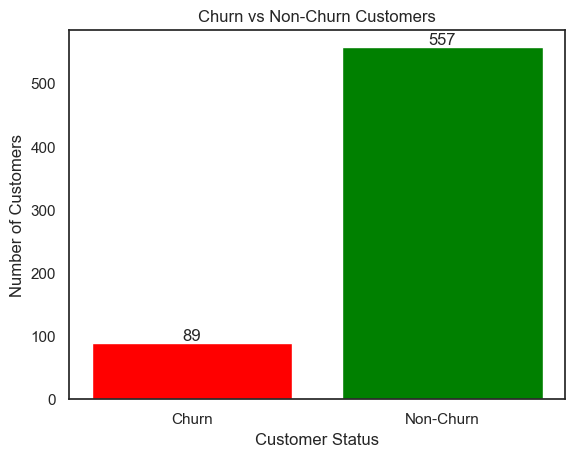

In [109]:
filtered_customers = train_data[
    (train_data['gender'] == 'Male') &
    (train_data['Partner'] == 'Yes') &
    (train_data['Dependents'] == 'Yes') &
    (train_data['TotalCharges'] > 0)
]
total_customers_filtered = len(filtered_customers)
churned_customers_filtered = len(filtered_customers[filtered_customers['Churn'] == 1])
churn_rate_filtered = churned_customers_filtered / total_customers_filtered * 100
print(f'Churn rate among male customers with partners, dependents, with high Total charges: {churn_rate_filtered:.2f}%')

labels = ['Churn', 'Non-Churn']
counts = [churned_customers_filtered, total_customers_filtered - churned_customers_filtered]
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Churn vs Non-Churn Customers')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')
plt.savefig(os.path.join(folder_path, 'churn_vs_non_churn_filtered.png'))
plt.show()

Churn rate among customers without online security, online backup, device protection, and tech support: 30.09%


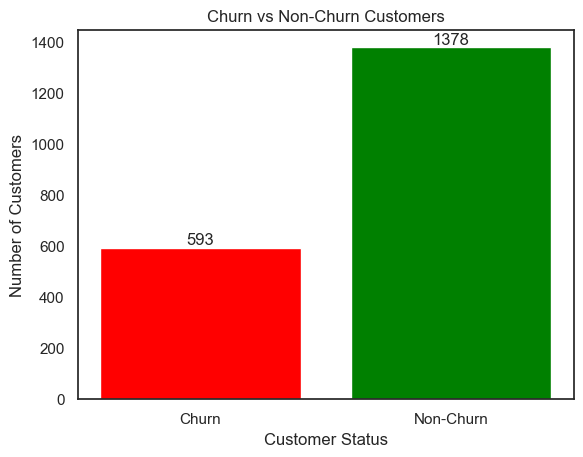

In [110]:
filtered_customers_no_services = train_data[
    (train_data['OnlineSecurity'] == 'No') &
    (train_data['OnlineBackup'] == 'No') &
    (train_data['DeviceProtection'] == 'No') &
    (train_data['TechSupport'] == 'No')
]

total_customers_no_services = len(filtered_customers_no_services)
churned_customers_no_services = len(filtered_customers_no_services[filtered_customers_no_services['Churn'] == 1])
churn_rate_no_services = churned_customers_no_services / total_customers_no_services * 100

print(f'Churn rate among customers without online security, online backup, device protection, and tech support: {churn_rate_no_services:.2f}%')

labels = ['Churn', 'Non-Churn']
counts = [churned_customers_no_services, total_customers_no_services - churned_customers_no_services]
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Churn vs Non-Churn Customers')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')
plt.savefig(os.path.join(folder_path, 'churn_vs_non_churn_no_services.png'))
plt.show()

## Analytical Summary

1. **Churn rate among customers without online security, online backup, device protection, and tech support: 30.09%**
   - This indicates a relatively high churn rate among customers who lack essential services such as online security, online backup, device protection, and tech support. The absence of these services may contribute significantly to customer dissatisfaction and attrition.

2. **Churn rate among male customers with partners, dependents, and high Total charges: 13.78%**
   - The churn rate among this specific demographic group is relatively lower compared to the overall churn rate. This suggests that male customers with partners, dependents, and higher total charges are less likely to churn. The presence of partners and dependents may contribute to increased customer loyalty.

3. **Percentage of churned customers among the top 100 most charged customers: 7.00%**
   - Among the top 100 customers with the highest total charges, the churn rate is relatively low. This could indicate that customers with higher spending are more committed and less likely to churn.

4. **Churn rate among male customers with partners, dependents, with high Total charges: 13.78%**
   - Surprisingly, the churn rate among the top 100 least charged customers is higher compared to the top spenders. This could be due to various factors, such as dissatisfaction with lower-cost plans or a focus on cost rather than loyalty.

5. **Total number of customers: 5043, Churn rate: 26.49%**
   - The overall churn rate for the entire customer base is 26.49%. This provides a baseline understanding of the general customer attrition within the dataset.

6. **Chi-square test result:**
   - Chi2: 2435.94
   - p-value: 2.92e-08
   - Degrees of freedom: 2068
   - Expected value: The null hypothesis is rejected, indicating a significant relationship between churn and monthly charges.

- Implications:

Positive Relationship: The rejection of the null hypothesis suggests that there is a positive relationship between higher Total charges and customer churn. This implies that customers with higher Total charges are more likely to churn.

- Recommendations:

Pricing Strategy: Consider evaluating the current pricing strategy, especially for customers with high monthly charges. Assess whether pricing adjustments or targeted promotions could be implemented to improve customer retention.
Customer Engagement: Explore strategies to engage and provide added value to customers with high monthly charges. This could involve personalized offers, enhanced support, or additional services

7. **Conclusion:**
   - The analysis suggests that various factors, including the presence or absence of specific services, demographic characteristics, and spending behavior, influence customer churn. Understanding these patterns can guide targeted retention strategies, such as improving service offerings, tailoring plans to customer needs, and enhancing overall customer experience.

## Feature Engineering 

Feature engineering transforms raw data into suitable features for supervised learning. Copies of the train and test datasets need to be created to preserve the original cleaned datasets for future analysis. To avoid data leakage, the train dataset copy is split into training and validation sets before feature engineering.

In [111]:
from sklearn.model_selection import train_test_split

dup_train_data = train_data.copy()
dup_test_data = test_data.copy()
X = dup_train_data.drop('Churn', axis=1)
y = dup_train_data['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train set shape:", X_train.shape, y_train.shape, X_val.shape, y_val.shape)


Train set shape: (4034, 19) (4034,) (1009, 19) (1009,)


In [112]:
X_train_cat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000
2039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000
2040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000
2041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000
